**Company : Cognifront**

---

**Machine Learning Intern**

---

**Name : Neha Deo**

---

**Assignment : Determine it will rain tomorrow or not? using Logistic Regression.**

---

**Description : Predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow Content. This dataset contains daily weather observations from numerous Australian weather stations. The target variable RainTomorrow means: Did it rain the next day? Yes or No.**

---

**Importing Libraries and Acquiring Data**

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("/content/weather_aus.csv")

**Printing First 5 Records**

In [2]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Printing Total No. of Rows and Columns

In [3]:
df.shape

(142193, 24)

**Printing Statistical Information**

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,140093.000000,140405.000000,139339.000000,81350.000000,74377.000000,131483.000000,139404.000000,138121.000000,138955.000000,137118.000000,126715.000000,126747.000000,88198.000000,84691.000000,139825.000000,138002.000000,140727.000000
mean,12.164958,23.153292,2.367070,5.469824,7.624853,39.968878,13.965417,18.653970,69.120845,51.777126,1017.659044,1015.279711,4.432776,4.501612,16.947062,21.610214,2.377139
std,6.387259,7.074520,8.496989,4.188537,3.781525,13.614193,8.895559,8.819356,18.823555,20.642849,7.112139,7.039617,2.887093,2.720221,6.465029,6.891343,8.507090
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.100000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.300000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


**Plotting CountPlot**

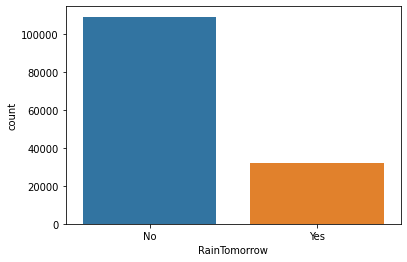

In [5]:
sns.countplot(x= 'RainTomorrow',data=df)

**Plotting BoxPlot**

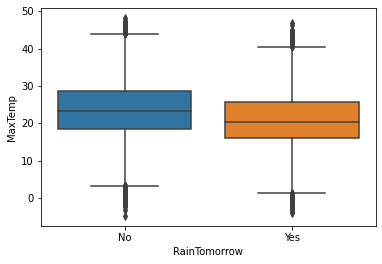

In [6]:
sns.boxplot(x = 'RainTomorrow',y='MaxTemp', data=df)

**Plotting BarPlot**

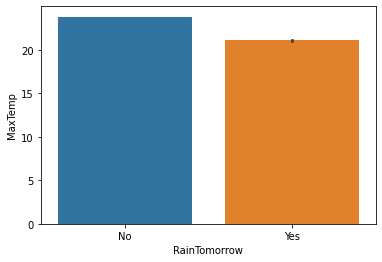

In [7]:
sns.barplot(x = 'RainTomorrow',y='MaxTemp', data=df)

**Dropping the NaN values from the data** 

In [8]:
df.dropna(inplace=True)

**Preprocessing**

In [9]:
from sklearn.preprocessing import LabelEncoder
categorical_var = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
le = LabelEncoder()
for i in categorical_var:
    df[i] = le.fit_transform(df[i])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,01/01/2009,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0.0,0
5940,02/01/2009,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0.0,0
5942,04/01/2009,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0.0,0
5943,05/01/2009,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0.0,0
5944,06/01/2009,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0.0,0


**Splitting Feature and Target Variable**

In [10]:
X = df.drop(["Date","RISK_MM","RainTomorrow"], axis=1)
y = df['RainTomorrow']

**Splitting Data into Training and Testing**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=156)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Train the Model**

In [13]:
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression()
result = my_model.fit(X_train, y_train)

**Test the Model**

In [14]:
predictions = result.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

**Measuring Accuracy Score**

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8519142148174407

**Measuring Performance**

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,8297,492
Actual pos,1179,1316


**Plotting HeatMap for Confusion Matrix**

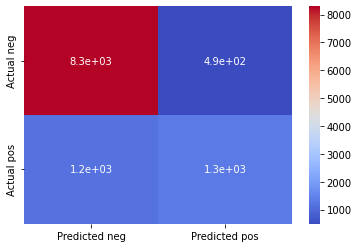

In [19]:
Color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot = True)

**Deploy the Model**

In [20]:
pred_new=my_model.predict([[4,17.9,35.2,0,12,12.3,11,48,1,12,6,20,20,13,1006.3,1004.4,2,5,26.6,33.4,0]])
pred_new

array([0])

In [21]:
pred_new=my_model.predict([[15.0,46.0,23.0,1008.6,1008.3,2.0,6.0,28.1,33.2,1,5963,4,19.7,37.3,0.0,14.2,13.4,11,28.0,9,1]])
pred_new

array([0])